In [1]:
# import basic libraries
import pickle
import yt
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10
from astropy import units as u

# import halo catalogue func
from yt.analysis_modules.halo_analysis.api import *

In [2]:
# import libraries - not sure what they do
# used to ensure halo catalog loads properly
import tempfile
import shutil
import os

# Create temporary directory for storing files
tmpdir = tempfile.mkdtemp()

In [4]:
# load halo dataset
halos_ds = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres160.0.h5')

# load raw dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')

# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

yt : [INFO     ] 2017-06-28 14:08:17,121 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-06-28 14:08:17,124 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-28 14:08:17,127 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-28 14:08:17,130 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-06-28 14:08:17,133 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-28 14:08:17,135 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-06-28 14:08:17,137 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-06-28 14:08:17,140 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-06-28 14:08:17,142 Parameters: hubble_constant           = 0.6933
yt : [INFO     ] 2017-06-28 14:08:17,298 Parameters: current_time              = 158.01757996843
yt : [INFO     ] 2017-06-28 14:08:17,301 Param

In [5]:
# specify boundaries of zoom-in box
# scaling factor multiplied by info from text file 
# units in cm
scaling = 2.22535525e+25 # scales dataset coords to cm

xmin = scaling*0.39319589 * u.cm
ymin = scaling*0.42984636 * u.cm
zmin = scaling*0.41706725 * u.cm

xmax = scaling*0.56298484 * u.cm
ymax = scaling*0.55089246 * u.cm
zmax = scaling*0.56698254 * u.cm

In [7]:
# --load ratio of stellar mass to halo mass
# first list uses first output of TotalMass funct
# second list uses second output

with open('./LG4_2048_40pc/rd0070/ratio_list0070_1.txt', 'rb') as ratiofile1:
    ratiolist1 = pickle.load(ratiofile1)
    
with open('./LG4_2048_40pc/rd0070/ratio_list0070_2.txt', 'rb') as ratiofile2:
    ratiolist2 = pickle.load(ratiofile2)

In [28]:
bins = np.geomspace(start=1e-4, stop=10**1.5, num=55)

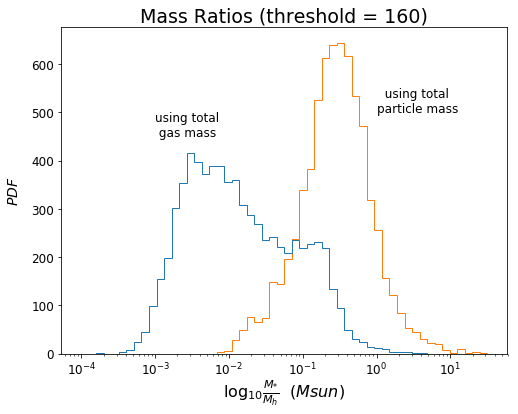

In [125]:
# Two subplots
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(111)

# plot both ratio lists
ratiolists = [ratiolist1, ratiolist2]
ax1.hist(ratiolists, bins, histtype='step', fill = False)
ax1.set_title("Mass Ratios (threshold = 160)", size = 19)
#ax1.axis([1e-4, 10**1.5, 0, 700])

# create axis labels
xlab = r"$\log_{10}\frac{M_{*}}{M_h}$  $(Msun)$"
ylab = "$PDF$"
ax1.set_xlabel(xlab, size = 16, labelpad= 0)
ax1.set_ylabel(ylab, rotation = 90, size = 14, labelpad= 10)

# create axis ticks 
ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.tick_params(axis='y', which='major', labelsize=12)

# add labels for each plot
annotation1 = "using total \n gas mass"
annotation2 = "  using total\nparticle mass"
ax1.text(1e-3, 450, annotation1, size = 12)
ax1.text(1, 500, annotation2, size = 12)


plt.show()

#plt.savefig('./LG4_2048_40pc/rd0070/massratios.png', dpi = 300)

In [124]:
# find log arrays for ratio lists
log_ratio1 = np.log(ratiolist1) / log(10)
log_ratio2 = np.log([value for value in ratiolist2 if value > 0]) / log(10)

# find histogram parameters
density1, bin_edges1 = np.histogram(log_ratio1, bins= np.linspace(-3.5, 0.4, 39))
density2, bin_edges2 = np.histogram(log_ratio2, bins= np.linspace(-2.2, 1.1, 33))


log_density1 = np.log(density1) / log(10)
log_density2 = np.log(density2) / log(10)

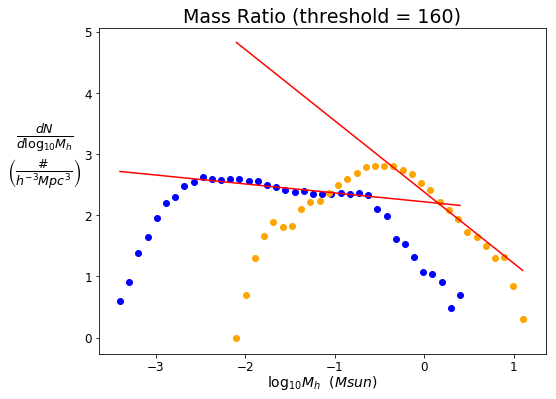

In [161]:
# specify figure size
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(111)

# --determine line of best fit
# reduce range of values to fit line
bin_edges_fit1 = bin_edges1[8:-10]
bin_edges_fit2 = bin_edges2[16:-4]
log_density_fit1 = log_density1[7:-10]
log_density_fit2 = log_density2[15:-4]
# determine line
par1 = np.polyfit(bin_edges_fit1, log_density_fit1, 1, full=True)
par2 = np.polyfit(bin_edges_fit2, log_density_fit2, 1, full=True)
slope1, intercept1 = par1[0][0], par1[0][1]
slope2, intercept2 = par2[0][0], par2[0][1]

# plot data and line
bin_edges_red1 = bin_edges1[1:]
bin_edges_red2 = bin_edges2[1:]
ax2.scatter(bin_edges_red1, log_density1, color = 'blue')
ax2.scatter(bin_edges_red2, log_density2, color = 'orange')
ax2.plot(bin_edges_red1, slope1 * bin_edges_red1 + intercept1, color = 'red')
ax2.plot(bin_edges_red2, slope2 * bin_edges_red2 + intercept2, color = 'red')
ax2.set_title("Mass Ratio (threshold = 160)", size = 19)

# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
ax2.set_xlabel(xlab, size = 14, labelpad= 0)
ax2.set_ylabel(ylab, rotation = 0, size = 18, labelpad= 40)

# create axis ticks 
ax2.set_yscale('linear')
ax2.tick_params(axis='x', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)

# add slope and intercept
# annotation = "$a = {:1.3f}$ \n$b = {:1.3f}$".format(slope, intercept)
# plt.text(9.5, 1.5, annotation, size = 12)

#show and save
plt.show()

In [156]:
print(bin_edges1[8:-4].size)
log_density1[7:-4].size

27


27